# 数据加载、时间序列转换与可视化

本 notebook 从已保存的 CSV 文件加载数据，转换为时间序列格式（适配 pysindy），并进行可视化

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import pysindy as ps 
from sklearn.linear_model import Lasso
from tools.tools import get_positive_contributions, compute_entropy, print_equations, fit_sindy_sr3_robust, lift_time_delay, plot_station
from tools.tools import split_and_group_matrices, plot_macro_serie
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from read_data_improved import main, format_timeseries_data

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 步骤 1: 生成并保存数据

In [2]:
# print("="*60)
# print("生成训练和测试数据...")
# print("="*60)
# main(atten_type = 1, trial_type = 1)

## 步骤 2: 从 CSV 文件加载数据

In [3]:
print("\n" + "="*60)
print("加载保存的数据...")
print("="*60)

train_data = {}
test_data = {}

for stage in [1, 2, 3]:
    base_path = f'./visual_inducted_conscious/1/stage{stage}'
    train_data[stage] = np.load(f'{base_path}/train_seqs.npy')  
    test_data[stage] = np.load(f'{base_path}/test_seqs.npy')  
    



加载保存的数据...


## 步骤 5: 绘制时间序列图

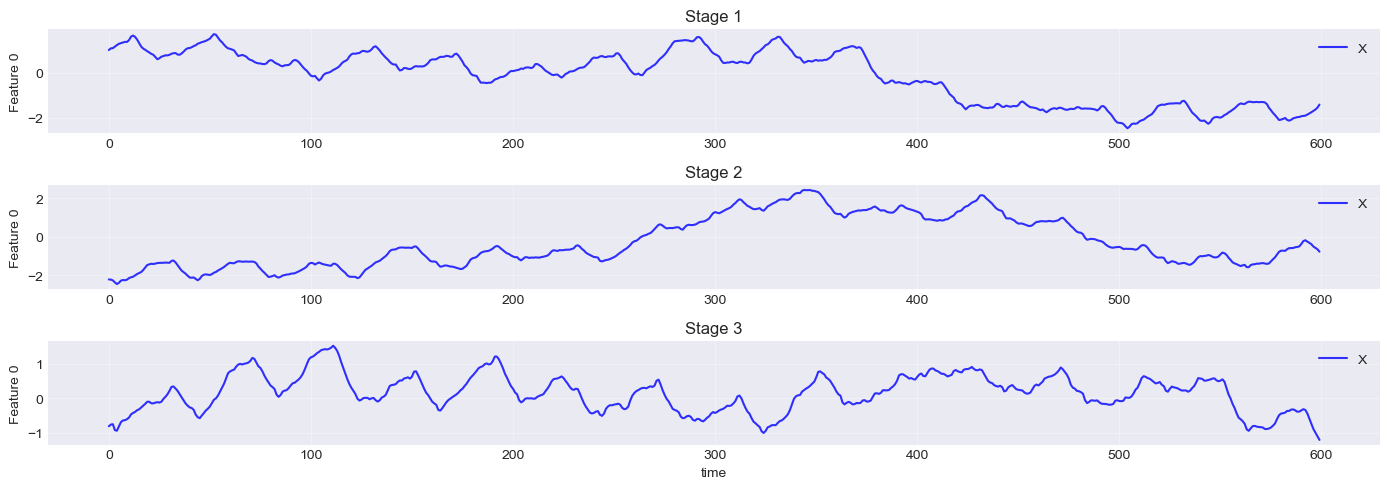

✓ 时间序列图绘制完成


In [4]:
# 绘制 3 个阶段的时间序列
fig, axes = plt.subplots(3, 1, figsize=(14, 5))
feature = 0  # 只绘制第一个特征

for idx, stage in enumerate([1, 2, 3]):
    # 获取数据
    X_train = train_data[stage][0]
    
    # 绘制特征值
    axes[idx].plot(X_train[:, feature], 'b-', linewidth=1.5, alpha=0.8, label='X')
    axes[idx].set_ylabel(f'Feature {feature}')
    axes[idx].set_title(f'Stage {stage}')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()
    

axes[2].set_xlabel('time')
plt.tight_layout()
plt.show()

print("✓ 时间序列图绘制完成")

## 步骤 8: 数据准备完成 - 可直接用于 pysindy

In [5]:
stage = 2
x_data = []
for i in range(len(train_data[stage])):
    x_data.append(train_data[stage][i])
micro_name = []
for i in range(x_data[0].shape[1]):
    micro_name.append('x'+str(i))
micro_name, x_data[0].shape, len(x_data)

(['x0',
  'x1',
  'x2',
  'x3',
  'x4',
  'x5',
  'x6',
  'x7',
  'x8',
  'x9',
  'x10',
  'x11',
  'x12',
  'x13',
  'x14',
  'x15',
  'x16',
  'x17',
  'x18',
  'x19',
  'x20',
  'x21',
  'x22',
  'x23',
  'x24',
  'x25',
  'x26',
  'x27',
  'x28',
  'x29',
  'x30',
  'x31',
  'x32',
  'x33',
  'x34',
  'x35',
  'x36',
  'x37',
  'x38',
  'x39',
  'x40',
  'x41',
  'x42',
  'x43',
  'x44',
  'x45',
  'x46',
  'x47',
  'x48',
  'x49',
  'x50',
  'x51',
  'x52',
  'x53',
  'x54',
  'x55',
  'x56',
  'x57',
  'x58',
  'x59',
  'x60',
  'x61',
  'x62',
  'x63',
  'x64',
  'x65',
  'x66',
  'x67',
  'x68',
  'x69',
  'x70',
  'x71',
  'x72',
  'x73',
  'x74',
  'x75',
  'x76',
  'x77',
  'x78',
  'x79',
  'x80',
  'x81',
  'x82',
  'x83',
  'x84',
  'x85',
  'x86',
  'x87',
  'x88',
  'x89',
  'x90',
  'x91',
  'x92',
  'x93',
  'x94',
  'x95',
  'x96',
  'x97',
  'x98',
  'x99',
  'x100',
  'x101',
  'x102',
  'x103',
  'x104',
  'x105',
  'x106',
  'x107',
  'x108',
  'x109',
  'x110',


# 选择观测函数

In [6]:
n_delays = 3
delay_interval = 5
H, names = lift_time_delay(x_data, feature_names=micro_name, n_delays=n_delays, delay_interval=delay_interval)
x_data_lift = H
H[0].shape, len(H), names

✓ 成功处理 139 个序列，提升后数据形状: (81315, 564)


((585, 564),
 139,
 ['x0',
  'x1',
  'x2',
  'x3',
  'x4',
  'x5',
  'x6',
  'x7',
  'x8',
  'x9',
  'x10',
  'x11',
  'x12',
  'x13',
  'x14',
  'x15',
  'x16',
  'x17',
  'x18',
  'x19',
  'x20',
  'x21',
  'x22',
  'x23',
  'x24',
  'x25',
  'x26',
  'x27',
  'x28',
  'x29',
  'x30',
  'x31',
  'x32',
  'x33',
  'x34',
  'x35',
  'x36',
  'x37',
  'x38',
  'x39',
  'x40',
  'x41',
  'x42',
  'x43',
  'x44',
  'x45',
  'x46',
  'x47',
  'x48',
  'x49',
  'x50',
  'x51',
  'x52',
  'x53',
  'x54',
  'x55',
  'x56',
  'x57',
  'x58',
  'x59',
  'x60',
  'x61',
  'x62',
  'x63',
  'x64',
  'x65',
  'x66',
  'x67',
  'x68',
  'x69',
  'x70',
  'x71',
  'x72',
  'x73',
  'x74',
  'x75',
  'x76',
  'x77',
  'x78',
  'x79',
  'x80',
  'x81',
  'x82',
  'x83',
  'x84',
  'x85',
  'x86',
  'x87',
  'x88',
  'x89',
  'x90',
  'x91',
  'x92',
  'x93',
  'x94',
  'x95',
  'x96',
  'x97',
  'x98',
  'x99',
  'x100',
  'x101',
  'x102',
  'x103',
  'x104',
  'x105',
  'x106',
  'x107',
  'x108',
 

In [7]:
# # 候选的观测函数
# ide = ps.IdentityLibrary()
# fourier = ps.FourierLibrary(n_frequencies=1)
# ode_lib = ps.PolynomialLibrary(degree=2,include_bias=False)
# library_functions = [
#     lambda x: x,
#     lambda x: np.sin(x),
#     lambda x: np.cos(x),
# ]
# custom_library = ps.CustomLibrary(library_functions=library_functions)

# # 选定观测函数
# library = ide + fourier

# # 进行lift
# library.fit(x_data)
# x_data_lift = library.transform(x_data)
# names = library.get_feature_names()

# # 单时间序列
# print(x_data_lift[0].shape)
# # 多时间序列
# #print(x_data_lift[0].shape)
# # 检查观测函数变量名
# print(names)

# 进行拟合

In [34]:
x_data_lift = H
discrete_time = False
dt = 1
thresholds = np.logspace(0, 1, 7)
print(thresholds)
model, results = fit_sindy_sr3_robust(x_data_lift, ide, names, penalty='l1', discrete_time=discrete_time, max_iter=300, thresholds=thresholds, metric='mse', tol=1e-4, nu=1)

[ 1.          1.46779927  2.15443469  3.16227766  4.64158883  6.81292069
 10.        ]
✓ 检测到 139 个时间序列（单独拟合，不拼接）
  序列 1: 585 个样本, 564 个维度
  序列 2: 585 个样本, 564 个维度
  序列 3: 585 个样本, 564 个维度
  序列 4: 585 个样本, 564 个维度
  序列 5: 585 个样本, 564 个维度
  序列 6: 585 个样本, 564 个维度
  序列 7: 585 个样本, 564 个维度
  序列 8: 585 个样本, 564 个维度
  序列 9: 585 个样本, 564 个维度
  序列 10: 585 个样本, 564 个维度
  序列 11: 585 个样本, 564 个维度
  序列 12: 585 个样本, 564 个维度
  序列 13: 585 个样本, 564 个维度
  序列 14: 585 个样本, 564 个维度
  序列 15: 585 个样本, 564 个维度
  序列 16: 585 个样本, 564 个维度
  序列 17: 585 个样本, 564 个维度
  序列 18: 585 个样本, 564 个维度
  序列 19: 585 个样本, 564 个维度
  序列 20: 585 个样本, 564 个维度
  序列 21: 585 个样本, 564 个维度
  序列 22: 585 个样本, 564 个维度
  序列 23: 585 个样本, 564 个维度
  序列 24: 585 个样本, 564 个维度
  序列 25: 585 个样本, 564 个维度
  序列 26: 585 个样本, 564 个维度
  序列 27: 585 个样本, 564 个维度
  序列 28: 585 个样本, 564 个维度
  序列 29: 585 个样本, 564 个维度
  序列 30: 585 个样本, 564 个维度
  序列 31: 585 个样本, 564 个维度
  序列 32: 585 个样本, 564 个维度
  序列 33: 585 个样本, 564 个维度
  序列 34: 585 个样本, 564 个维度
  序列 35: 585

参数扫描 (l1): 100%|██████████| 7/7 [06:55<00:00, 59.40s/it]



最佳模型 (MSE) | Penalty: L1
参数 (Threshold): 1.000e+00
参数 (Lambda):    1.000e+00
MSE:         1.0000e-10
k:   628.0
评分 (mse):  0.0000

发现的方程:
(x0)' = 0.027 x0 + -0.036 x62 + -0.023 x0_d15
(x1)' = 0.000
(x2)' = -0.033 x62 + 0.022 x107
(x3)' = -0.036 x62 + 0.025 x107
(x4)' = 0.000
(x5)' = -0.028 x107
(x6)' = 0.020 x62 + -0.126 x107
(x7)' = 0.020 x62 + -0.117 x107
(x8)' = 0.020 x62 + -0.111 x107
(x9)' = 0.017 x62 + -0.092 x107
(x10)' = -0.066 x107
(x11)' = -0.058 x107
(x12)' = -0.056 x107
(x13)' = -0.068 x107
(x14)' = 0.014 x62 + -0.076 x107
(x15)' = 0.014 x62 + -0.076 x107
(x16)' = 0.014 x62 + -0.076 x107
(x17)' = 0.013 x62 + -0.072 x107
(x18)' = -0.069 x107
(x19)' = -0.062 x107
(x20)' = 0.000
(x21)' = -0.036 x107
(x22)' = -0.042 x107 + -0.006 x22_d15
(x23)' = -0.031 x107
(x24)' = 0.000
(x25)' = 0.000
(x26)' = -0.036 x107
(x27)' = -0.038 x107
(x28)' = 0.000
(x29)' = 0.000
(x30)' = 0.000
(x31)' = 0.000
(x32)' = 0.000
(x33)' = 0.000
(x34)' = 0.000
(x35)' = 0.000
(x36)' = 0.000
(x37)' = 0.000


In [33]:
x_data_lift = H
# 离散的迭代方程 or 连续的微分方程
discrete_time = True#False
dt = 1
ide = ps.IdentityLibrary()
# 候选拟合器
sr3_optimizer = ps.SR3(reg_weight_lam=0.2, regularizer="l1")
lasso_optimizer = Lasso(alpha=0.004, max_iter=20000, fit_intercept=True)
stlsq_optimizer = ps.STLSQ(threshold=0.01, alpha=0.9, verbose=True)

optimizer = stlsq_optimizer #lasso_optimizer

# 进行拟合
model = ps.SINDy(feature_library=ide, optimizer=optimizer, discrete_time=discrete_time)
model.fit(x_data_lift, t=dt, feature_names=names)
model.print()

 Iteration ... |y - Xw|^2 ...  a * |w|_2 ...      |w|_0 ... Total error: |y - Xw|^2 + a * |w|_2


/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


ValueError: array must not contain infs or NaNs

In [22]:
model.score(x_data_lift, t=dt)

0.6401485204696655

# 保存模型

In [23]:
import pickle  
import joblib  
import json  
import numpy as np  
import os  
from datetime import datetime  

# ========== 方式1：使用 pickle 保存（推荐，简单快速）==========  
def save_model_pickle(model, filepath):  
    """  
    使用 pickle 保存 SINDy 模型  
    """  
    with open(filepath, 'wb') as f:  
        pickle.dump(model, f)  
    print(f"✓ 模型已保存到: {filepath}")  

def load_model_pickle(filepath):  
    """  
    使用 pickle 加载 SINDy 模型  
    """  
    with open(filepath, 'rb') as f:  
        model = pickle.load(f)  
    print(f"✓ 模型已加载: {filepath}")  
    return model  

print("\n=== 方式1：简单保存（pickle）===")  
save_model_pickle(model, 'stage2_discreteF.pkl')  
model = load_model_pickle('stage2_discreteF.pkl')  
model.print()


=== 方式1：简单保存（pickle）===
✓ 模型已保存到: stage2_discreteF.pkl
✓ 模型已加载: stage2_discreteF.pkl
(x0)' = 0.004 x0 + 0.003 x1 + 0.005 x7 + 0.004 x61 + -0.033 x62 + 0.004 x94 + 0.001 x95 + 0.013 x98 + 0.002 x127 + 0.002 x132 + -0.008 x107_d5 + -0.011 x0_d15
(x1)' = 0.002 x1 + 0.006 x7 + 0.001 x16 + -0.007 x62 + 0.002 x93 + 0.002 x98 + 0.001 x109 + 0.001 x132 + -0.010 x107_d5 + -0.006 x1_d15 + -0.002 x6_d15 + -0.001 x105_d15 + -0.001 x106_d15
(x2)' = 0.006 x1 + 0.002 x7 + 0.003 x61 + -0.031 x62 + 0.003 x94 + 0.002 x95 + 0.011 x98 + 0.011 x107 + 0.002 x127 + -0.002 x1_d15 + -0.007 x2_d15 + -0.003 x107_d15
(x3)' = 0.001 x1 + 0.002 x7 + 0.004 x61 + -0.037 x62 + 0.002 x63 + 0.005 x94 + 0.002 x95 + 0.012 x98 + 0.018 x107 + 0.002 x127 + -0.003 x107_d5 + -0.005 x3_d15 + -0.001 x107_d15
(x4)' = 0.001 x72 + 0.002 x131 + 0.001 x132 + -0.003 x107_d10 + -0.004 x4_d15 + -0.001 x107_d15
(x5)' = -0.001 x3 + 0.010 x62 + -0.004 x63 + -0.001 x94 + -0.002 x95 + -0.018 x107 + -0.001 x132 + -0.001 x6_d5 + -0.002 x7_d5 +

# 多步预测

In [24]:
# # 单时间序列
# init_data = x_data_lift[0,:]
# # 多时间序列
init_data = x_data_lift[0][0,:]
step_pred = 10
t = range(step_pred)

if discrete_time:
    X_data_predicted = model.simulate(init_data,step_pred)
else:
    X_data_predicted = model.simulate(init_data,t) 

X_data_predicted.shape

(10, 564)

/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_18808/1491974586.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


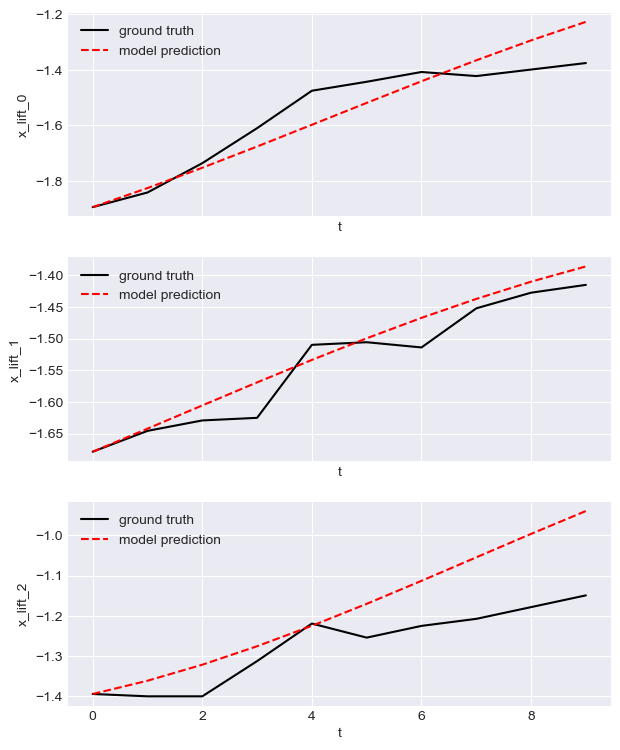

In [25]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 9))
for i in range(3):
    axs[i].plot(x_data_lift[0][:step_pred, i], "k", label="ground truth")
    axs[i].plot(X_data_predicted[:step_pred, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"x_lift_{}".format(i))
fig.show()

# 分析K

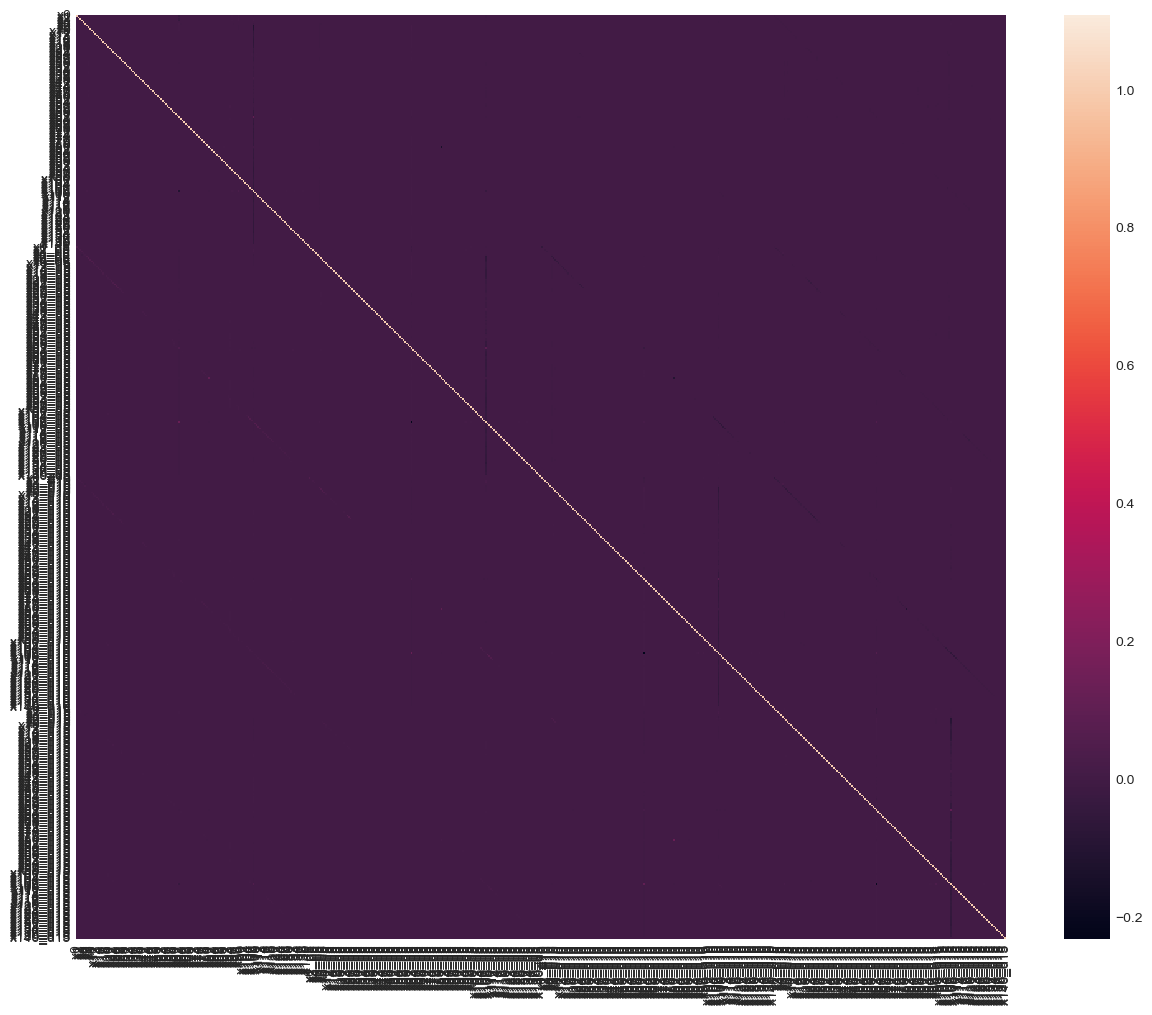

In [26]:
# 提取和处理系数矩阵
A = model.coefficients()
if discrete_time==False:
    A = scipy.linalg.expm(A)

# 只设置参数，不自动显示全部
plt.figure(figsize=(15, 12)) # 把画布搞大一点
plt.tick_params(axis='both', which='both', length=0)
_ = sns.heatmap(A, xticklabels=names, yticklabels=names)
# 旋转横轴标签，避免重叠
plt.xticks(rotation=90)  # 旋转90度
plt.yticks(rotation=0)   # 纵轴保持水平
plt.show()

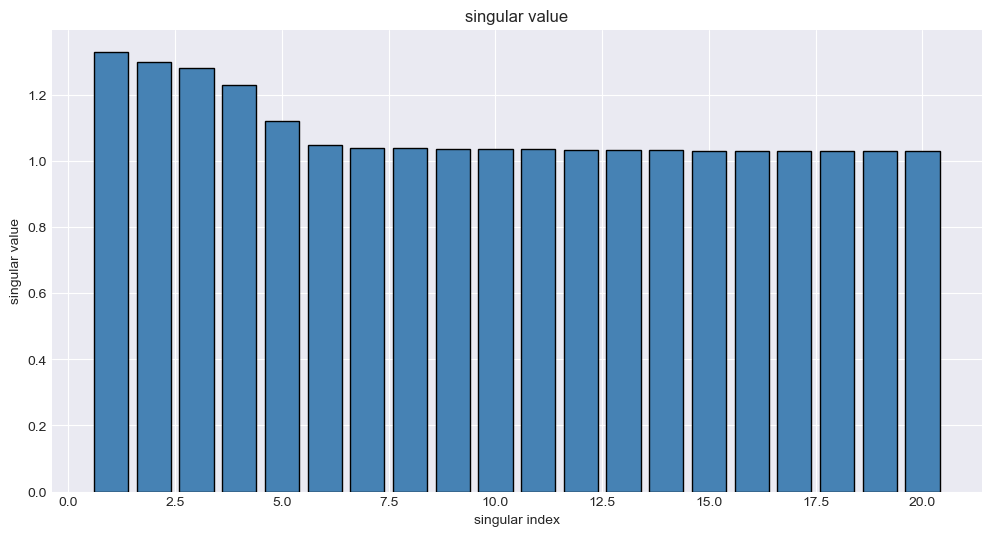

In [31]:
U,S,V = np.linalg.svd(A)
S = S[:20]
plt.figure()
plt.bar(np.arange(1, len(S)+1), S, color='steelblue', edgecolor='k')
plt.grid(True, axis='y')         
plt.xlabel('singular index')
plt.ylabel('singular value')
plt.title('singular value')
plt.show()

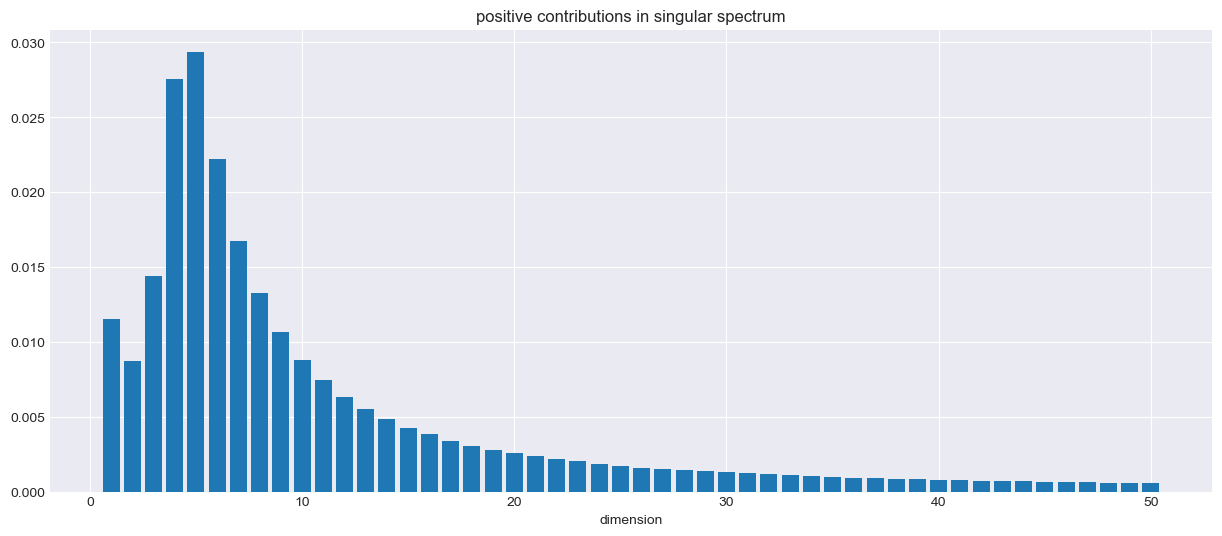

In [29]:
diff = get_positive_contributions(S)
diff = diff[:50]
plt.figure(figsize=(15, 6))
plt.bar(range(1,len(diff)+1), diff) 
plt.xlabel('dimension')
plt.title('positive contributions in singular spectrum')
plt.show()

In [17]:
print(compute_entropy(diff))

6.2744093


In [18]:
rank = 1
S_macro = S[:rank]
delt_gamma = sum(S_macro) / rank - sum(S) / len(S)
print(delt_gamma)

0.39468724


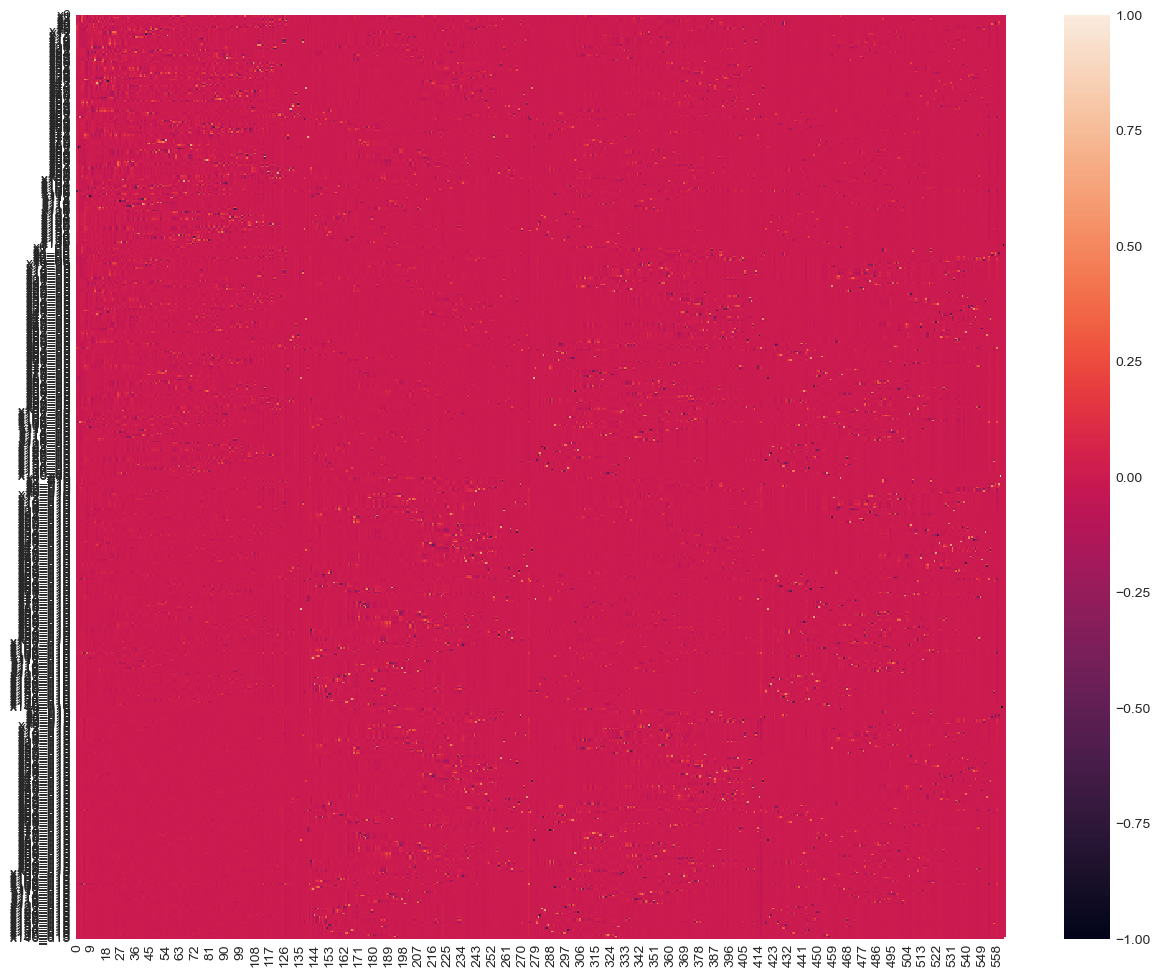

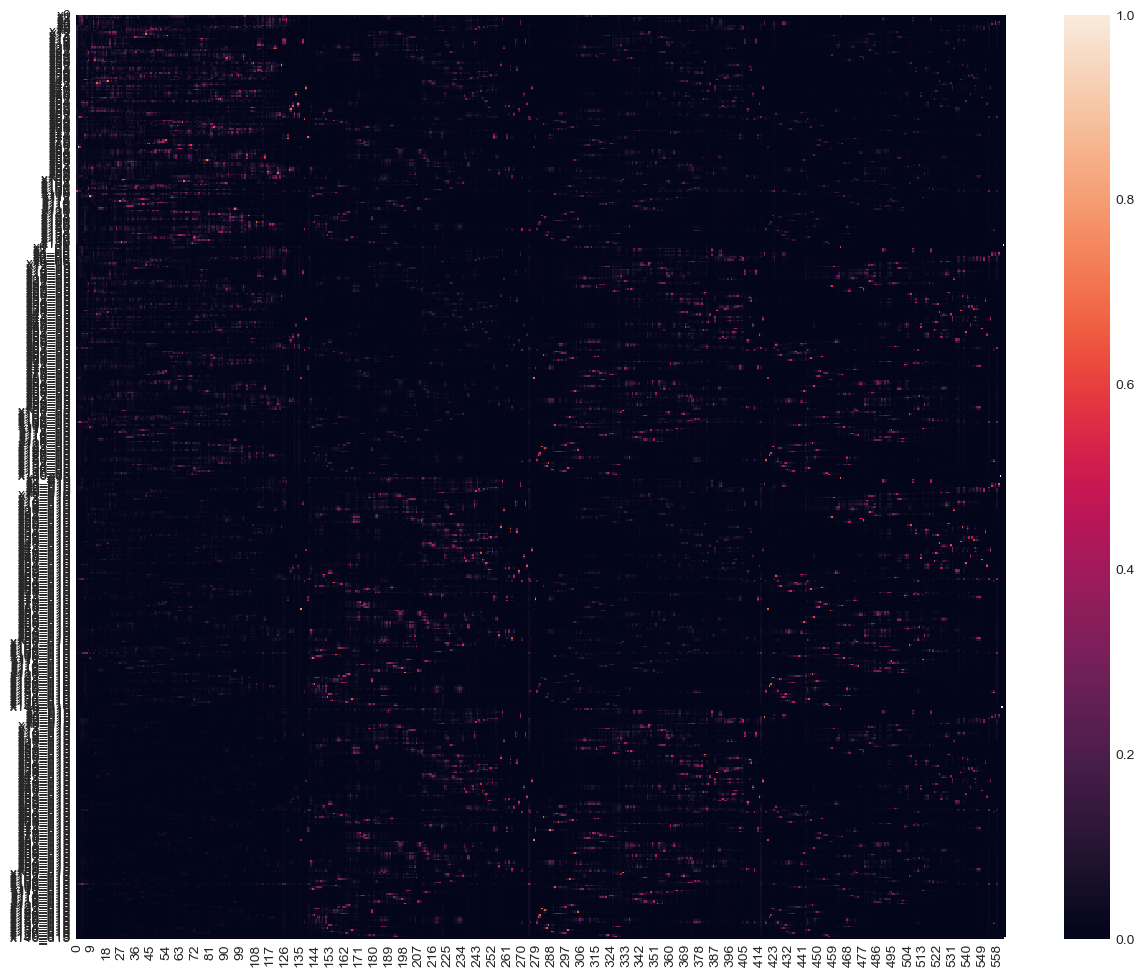

In [19]:
U_abs = np.abs(U)

plt.figure(figsize=(15, 12)) 
plt.tick_params(axis='both', which='both', length=0)
_ = sns.heatmap(U, yticklabels=names)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.show()


plt.figure(figsize=(15, 12)) 
plt.tick_params(axis='both', which='both', length=0)
_ = sns.heatmap(U_abs, yticklabels=names)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.show() 

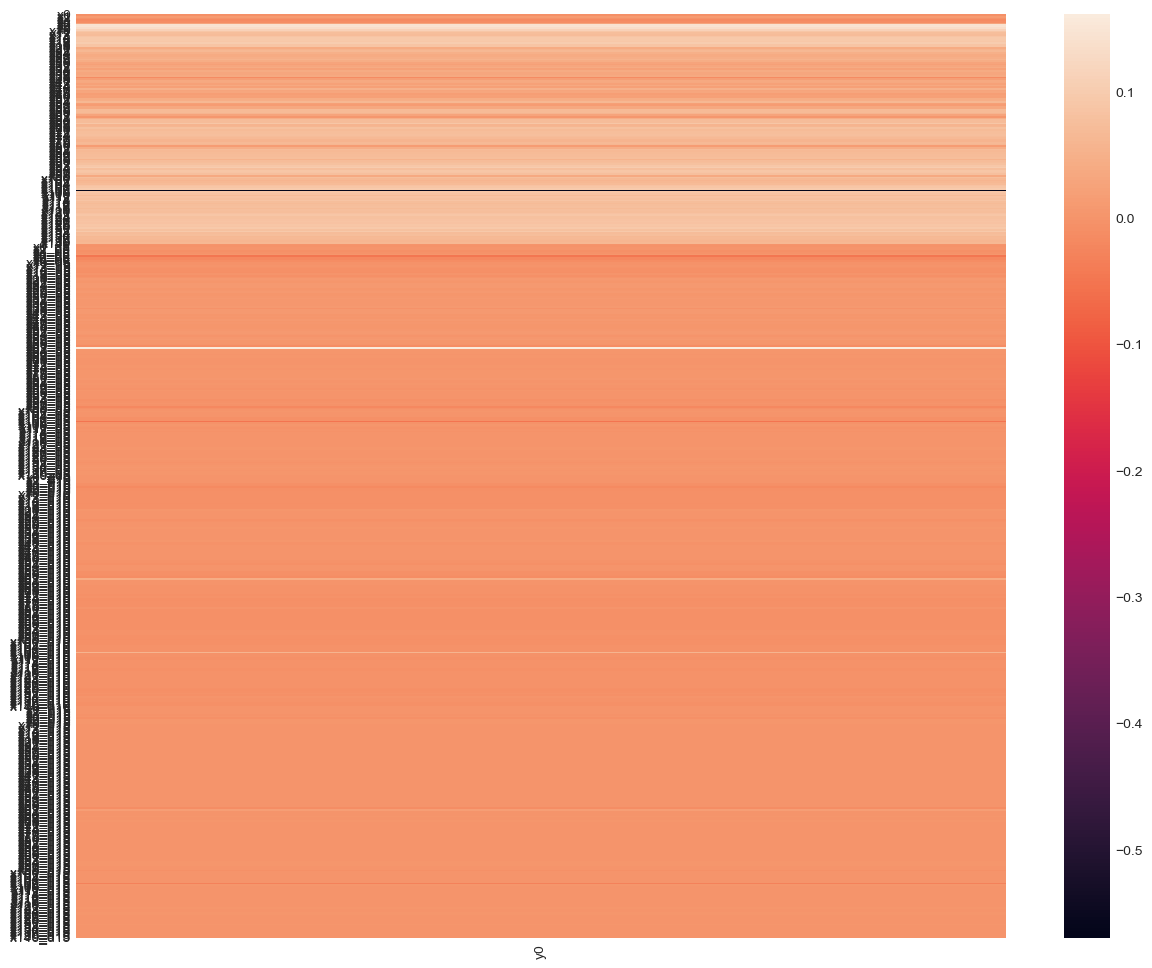

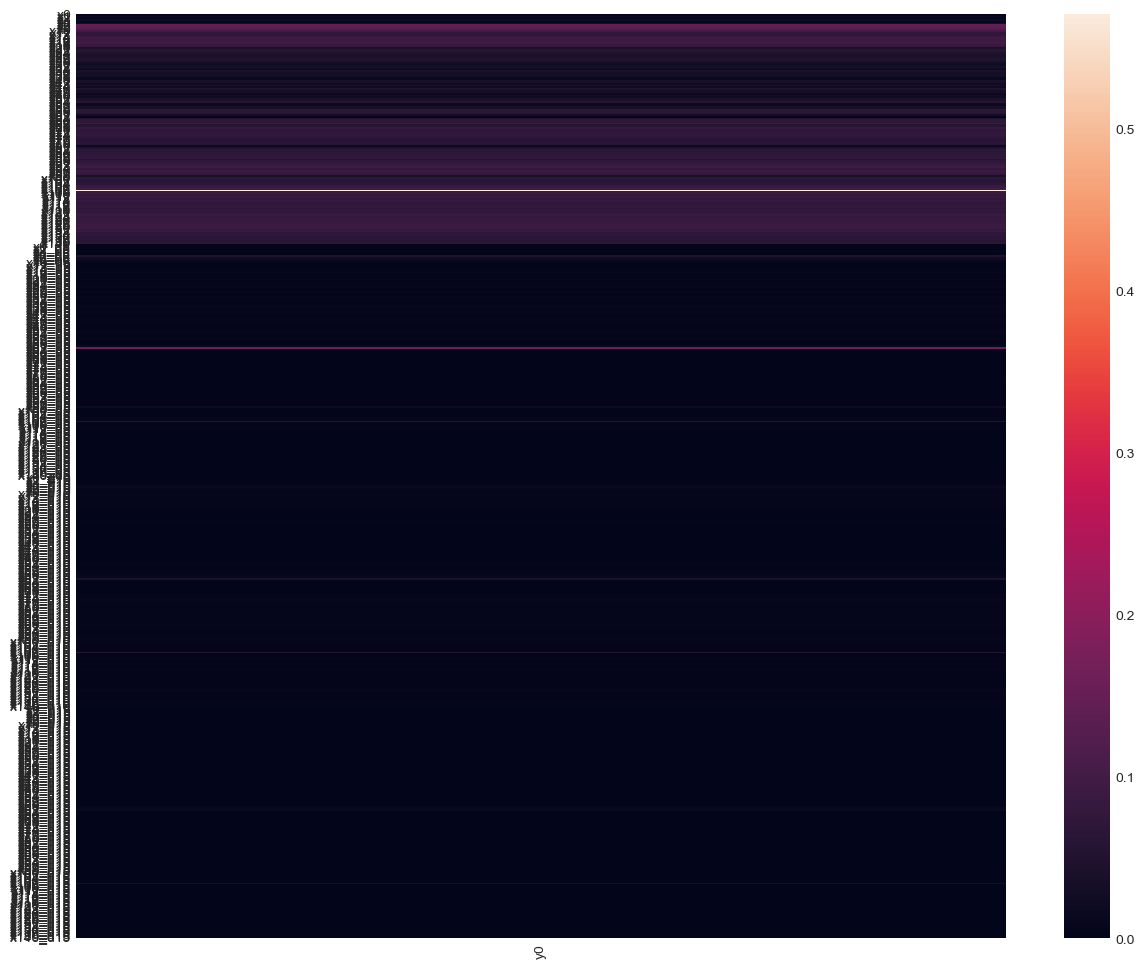

In [20]:
macro_name = [f'y{i}' for i in range(rank)]
coarse_grain_coff = U[:,:rank]

plt.figure(figsize=(15, 12)) 
plt.tick_params(axis='both', which='both', length=0)
_ = sns.heatmap(coarse_grain_coff, yticklabels=names, xticklabels=macro_name)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)    
plt.show()


plt.figure(figsize=(15, 12)) 
plt.tick_params(axis='both', which='both', length=0)
_ = sns.heatmap(np.abs(coarse_grain_coff), yticklabels=names, xticklabels=macro_name)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.show()